In [1]:
%matplotlib inline

import sys
sys.path.append('../')

In [2]:
from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

runs_margin = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["boundary_points", "margin", "kmeans",10, 30, 0.01, "Adam"])
print(len(runs_margin))
run_ids_margin = get_run_ids(runs_margin)

/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/analysis_helpers.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


10


In [3]:
runs_least = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.number_clusters"],[True, True, True, True, True, True],["boundary_points", "least_confident", "kmeans", 30, 0.01, 10])
print(len(runs_least))
run_ids_least = get_run_ids(runs_least)

10


In [4]:
runs_entropy = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.number_clusters"],[True, True, True, True, True, True],["boundary_points", "entropy", "kmeans", 30, 0.01, 10])
print(len(runs_entropy))
run_ids_entropy = get_run_ids(runs_entropy)

10


In [5]:
samples_labeled_margin, avg_accs_margin = get_labeledSamples_avgAcc(run_ids_margin, tracking)
samples_labeled_least, avg_accs_least = get_labeledSamples_avgAcc(run_ids_least, tracking)
samples_labeled_entropy, avg_accs_entropy = get_labeledSamples_avgAcc(run_ids_entropy, tracking)

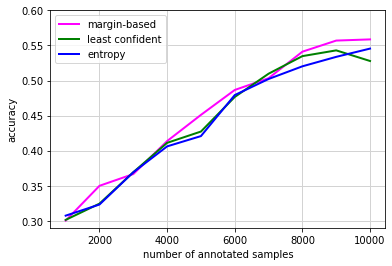

In [6]:
# plot
plt.plot(samples_labeled_margin, avg_accs_margin,color='magenta', label='margin-based', linewidth=2)
plt.plot(samples_labeled_least, avg_accs_least,color='green', label='least confident', linewidth=2)
plt.plot(samples_labeled_entropy, avg_accs_entropy,color='blue', label='entropy', linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

In [7]:
avg_accs_margin

array([0.30021, 0.34988, 0.36662, 0.41365, 0.45099, 0.48651, 0.50326,
       0.54108, 0.55692, 0.5586 ])

In [8]:
avg_accs_least

array([0.30128, 0.32447, 0.36927, 0.41112, 0.42723, 0.47651, 0.50969,
       0.53475, 0.54296, 0.52781])

In [9]:
avg_accs_entropy

array([0.30732, 0.32319, 0.36915, 0.40609, 0.42075, 0.47924, 0.50215,
       0.52023, 0.53371, 0.54549])